# Step 1: Understand the business problem.

1. URL - Website of the Zomato for each restaurant. - Object datatype
2. Address - Address of the Restaurant. - Object datatype
3. Name - Name of the restaurant. - Object datatype
4. Online Order - The customer ordered the menu online or not. - Object datatype
5. Book table - The customer has booked the table or not. - Object datatype
6. Rate - Rating of the restaurant that has by the customer. - Numerical datatype
7. Votes - The votes have been given by the customer to the restaurant. - Numerical 
datatype
8. Phone - Contact number of the Restaurant. - Object datatype
9. Location - The city name where the restaurant is located. - Object datatype
10. Rest Type - The type of restaurant. - Object datatype
11. Dish liked - Dishes liked by the customer from the restaurant. - Object datatype
12. Cuisines - The cuisines that have been prepared by the restaurant. - Object datatype
13. Approx Cost for two people - The approximate cost of the customer for 2 people. -
Number datatype
14. Reviews list - The reviews made by the customers on the restaurant. - Object 
datatype
15. Menu Item - The menu items that are usually available at the restaurant. - Object 
datatype
16. Listed in (type) - Contains the type of the meal. - Object datatype
17. Listed in (city) - This contains the neighborhood in which the restaurant is listed. -
Object datatype

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [3]:
import re

# step 2: Read the data and convert the data types.
Note: The data set has numerical and categorical data but due to noise(anomaly) in 
the data, the columns are treated as the object type. And You may feel like converting the 
features into numerical at this step if not appropriate at this stage, In that case, feel free to 
convert the variable to the appropriate type in the further step as well based on your way 
of analyzing the data.


In [4]:
zomato_orgnl=pd.read_csv('zomato.csv')
zomato_orgnl.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zomato_orgnl.shape

(51717, 17)

In [6]:
zomato_orgnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Drop thew columns which doesn't contribute anything to the project
zomato=zomato_orgnl.drop(['url','dish_liked','phone'],axis=1)

In [9]:
#Changing the Columns Names
zomato_orgnl.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

# Cleaning the dataset

In [10]:
zomato['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [11]:
zomato['cost'] = zomato['cost'].astype(str)
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       51717 non-null  object 
 1   name          51717 non-null  object 
 2   online_order  51717 non-null  object 
 3   book_table    51717 non-null  object 
 4   rate          43942 non-null  object 
 5   votes         51717 non-null  int64  
 6   location      51696 non-null  object 
 7   rest_type     51490 non-null  object 
 8   cuisines      51672 non-null  object 
 9   cost          51371 non-null  float64
 10  reviews_list  51717 non-null  object 
 11  menu_item     51717 non-null  object 
 12  type          51717 non-null  object 
 13  city          51717 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.5+ MB


In [12]:
#Reading uninque values from the Rate column
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
zomato['rate'].unique()
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0   4.100000
1   4.100000
2   3.800000
3   3.700000
4   3.800000
Name: rate, dtype: float64

# Step 3: Perform the described method for the data, Try to find any essential points from the 
described analysis. And check the missing values and Duplicate records. Impute the 
missing values in the best way possible.
Note: To impute the missing values with parameters, You must find the best parameter.
Hints:
● Check the distribution using plots. And check the Skewness, Kurtosis and etc.

In [14]:
zomato.describe()

,rate,votes,cost
count,41665.000000,49440.000000,49099.000000
mean,3.700449,296.763451,361.297400
std,0.440513,819.779986,231.111464
min,1.800000,0.000000,1.000000
25%,3.400000,9.000000,200.000000
50%,3.700000,47.000000,350.000000
75%,4.000000,212.000000,500.000000
max,4.900000,16832.000000,950.000000


In [15]:
zomato.describe(include=object).T


,count,unique,top,freq
address,49440,11050,Delivery Only,119
name,49440,8458,Cafe Coffee Day,93
online_order,49440,2,Yes,29342
book_table,49440,2,No,43120
location,49419,93,BTM,4793
rest_type,49215,93,Quick Bites,18003
cuisines,49395,2632,North Indian,2777
reviews_list,49440,22070,[],6395
menu_item,49440,8784,[],37758
type,49440,7,Delivery,24728


In [18]:
zomato.isnull().sum()/zomato.isnull().count()*100

address         0.000000
name            0.000000
online_order    0.000000
book_table      0.000000
rate           15.726133
votes           0.000000
location        0.042476
rest_type       0.455097
cuisines        0.091019
cost            0.689725
reviews_list    0.000000
menu_item       0.000000
type            0.000000
city            0.000000
dtype: float64

In [19]:
#Filling the missing Values
zomato['rate'].fillna(zomato['rate'].mode()[0],inplace=True)
zomato['rest_type'].fillna(zomato['rest_type'].mode()[0],inplace=True)
zomato['cost'].fillna(zomato['cost'].mean(),inplace=True)

# Drop null values

In [20]:
#Remove the NaN values from the dataset
zomato.dropna(how='any',inplace=True)
zomato.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [21]:
df_num=zomato.select_dtypes(include=np.number)
df_num.columns

Index(['rate', 'votes', 'cost'], dtype='object')

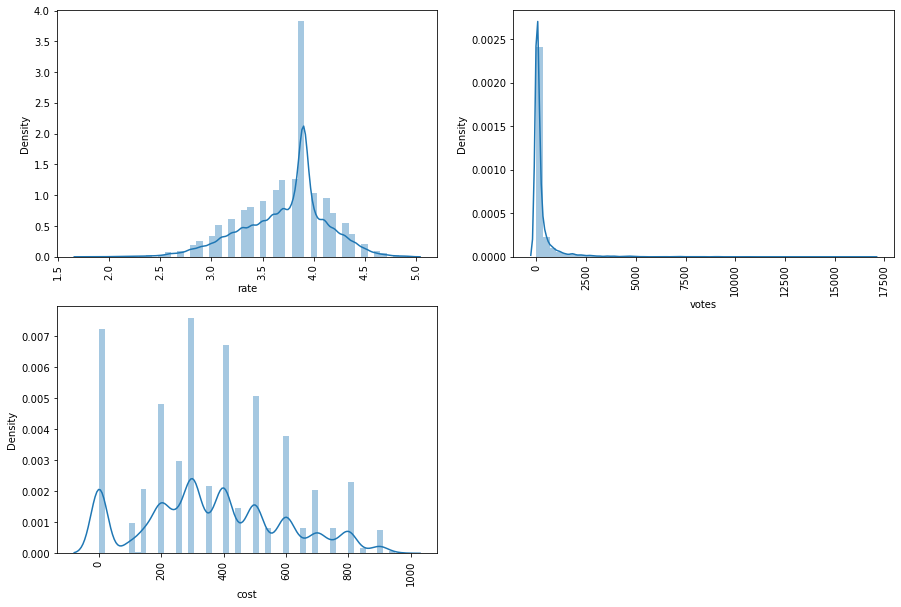

<Figure size 432x288 with 0 Axes>

In [22]:
#Density Plot
t=1
plt.figure(figsize=(15,10))
for i in df_num:
    plt.subplot(2,2,t)
    sns.distplot(zomato[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

In [23]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [24]:
zomato.shape

(49360, 14)

# Step 4: Once the basic preprocessing is done like converting the data types, missing value  imputation, and duplicate rows.
perform the EDA(Exploratory Data Analysis) on the data to  find the various factors that will help to understand the cost per two persons.

In [25]:
df_cat=zomato.select_dtypes(include=object)
df_cat.columns

Index(['address', 'name', 'online_order', 'book_table', 'location',
       'rest_type', 'cuisines', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

Text(0.5, 1.0, 'Restaurants delivering online or Not')

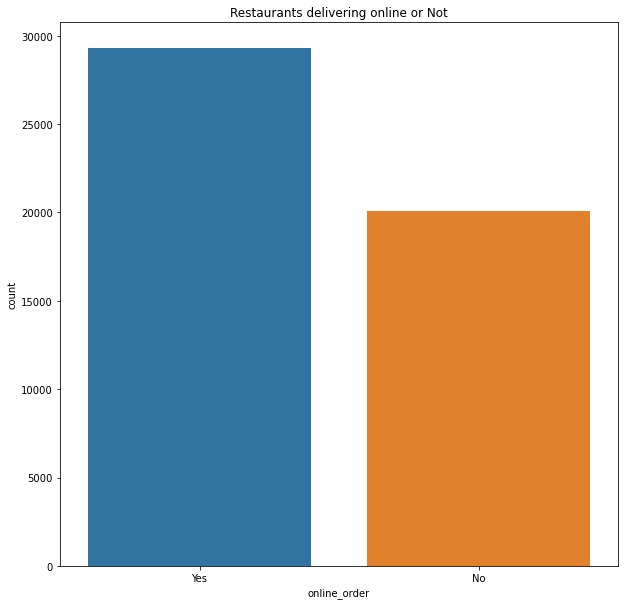

In [26]:
#Count Plot
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

# How many restaurants are present at different city?

In [27]:
zomato.city.value_counts()

BTM                      3100
Koramangala 7th Block    2823
Koramangala 5th Block    2706
Koramangala 4th Block    2676
Koramangala 6th Block    2486
Jayanagar                2287
JP Nagar                 1961
MG Road                  1765
Church Street            1758
Indiranagar              1740
Brigade Road             1715
Lavelle Road             1699
HSR                      1625
Marathahalli             1600
Residency Road           1587
Whitefield               1568
Bannerghatta Road        1500
Brookefield              1403
Old Airport Road         1369
Kammanahalli             1279
Kalyan Nagar             1229
Sarjapur Road            1224
Basavanagudi             1197
Bellandur                1152
Frazer Town              1145
Electronic City          1102
Malleshwaram             1067
Rajajinagar              1052
Banashankari              820
New BEL Road              725
Name: city, dtype: int64

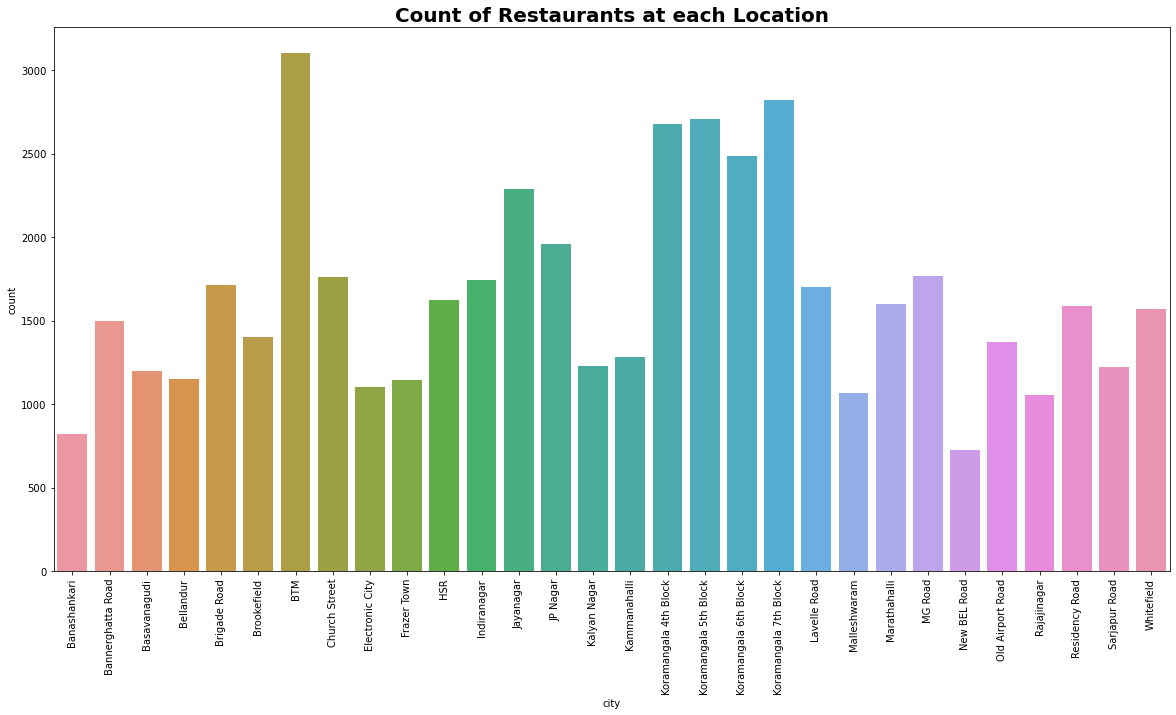

In [28]:
# Countplot of city

plt.figure(figsize=(20,10))
sns.countplot(x='city', data=zomato)
plt.title('Count of Restaurants at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

There are more than 3000 restaurants in BTM. Quick Google Search shows us that BTM is posh residential area so because of that there are quite a lot of restaurants and also it is famous for cafes. JP Nagar HSR, Koramangala 5th block, Whitefield, Indiranagar have more than 2000 restaurants and Jayanagar, Marathahalli, Bannerghatta Road have more than 1000 restaurants.

# Restaurant types

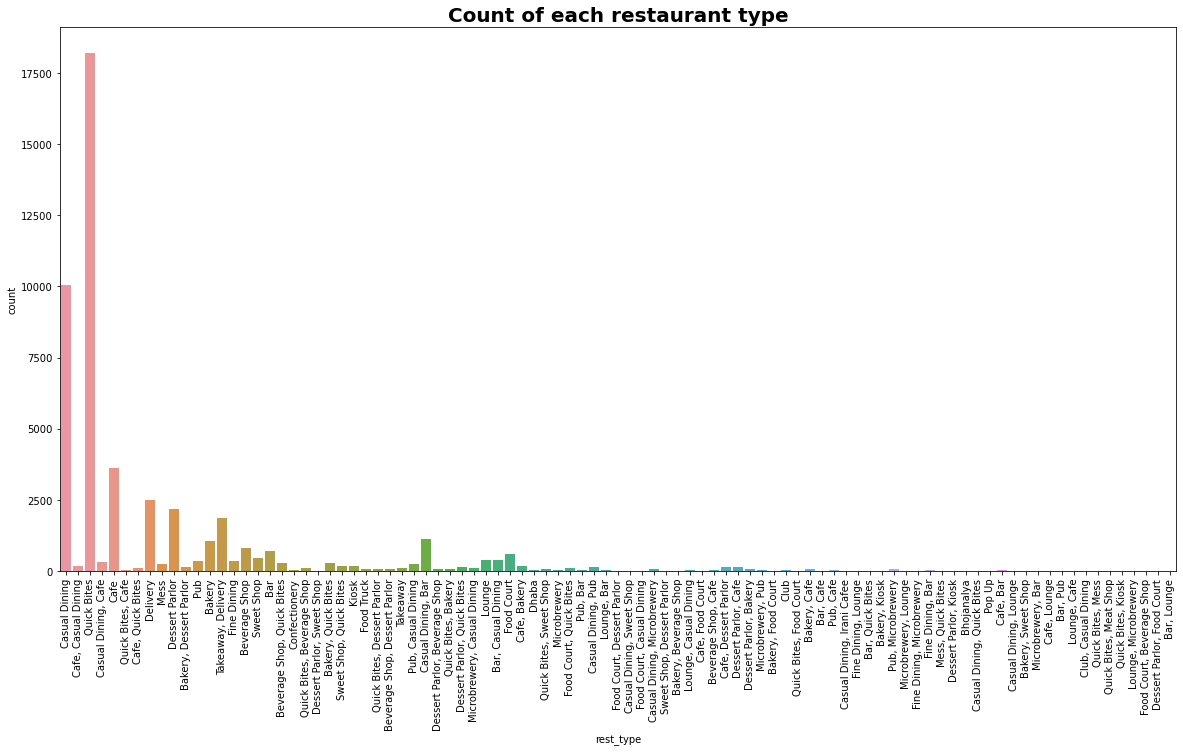

In [29]:
# Bar plot of rest_type

plt.figure(figsize=(20,10))
sns.countplot(x='rest_type', data=zomato)
plt.xticks(rotation=90)
plt.title('Count of each restaurant type', fontsize=20, fontweight='bold')
plt.show()

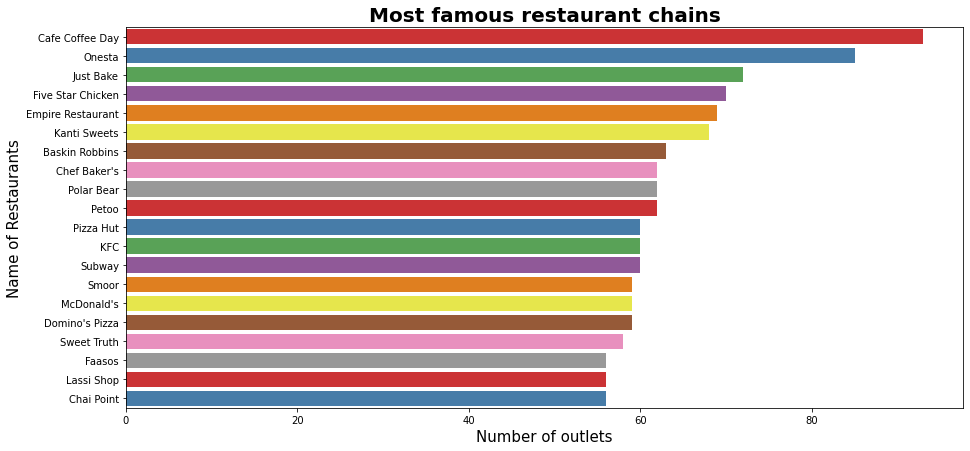

In [30]:
#Bar Plot
plt.figure(figsize=(15,7))
chains = zomato['name'].value_counts()[:20]
sns.barplot(x=chains, y=chains.index, palette='Set1')
plt.xlabel("Number of outlets", size=15)
plt.ylabel("Name of Restaurants", size=15)
plt.title("Most famous restaurant chains", fontsize=20, fontweight='bold')
plt.show()

### Cafe Coffee Day has maximum outlets in the city and is followed by Onesta with number of outlets little more than 80. It can be seen that most famous restaurant chains have more than 50 outlets.

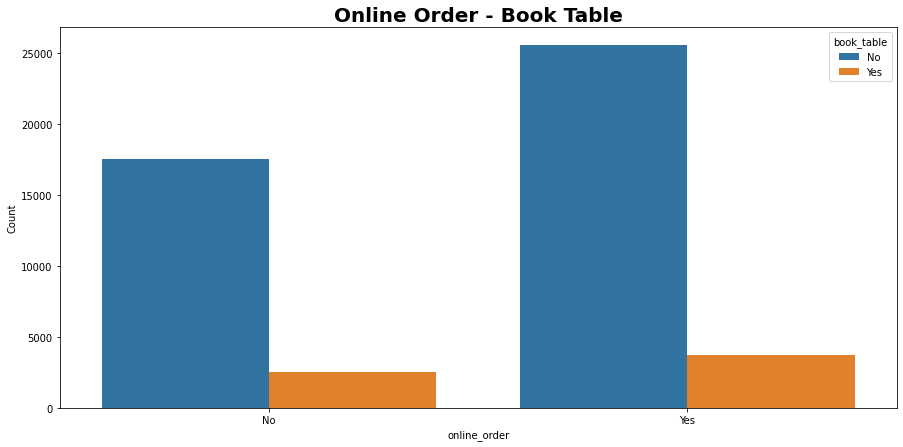

In [30]:
df_online_booking = zomato.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
plt.figure(figsize = (15,7))
sns.barplot(x="online_order", y="Count", hue="book_table", data=df_online_booking)
plt.title("Online Order - Book Table", fontsize=20, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Location')

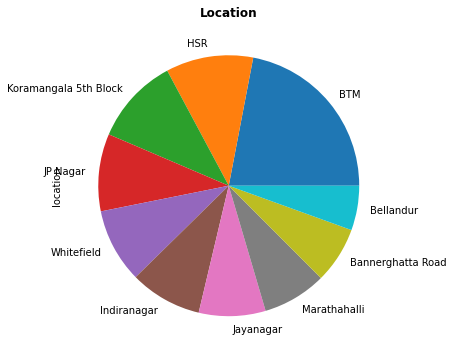

In [32]:
#Pie Chart
plt.figure(figsize=(12,6)) 
zomato_orgnl['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

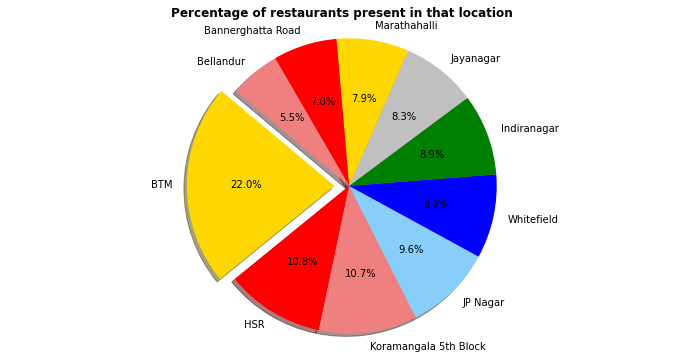

In [36]:
plt.figure(figsize = (12,6))
names = zomato_orgnl['location'].value_counts()[:10].index
values = zomato_orgnl['location'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

# Step 5: Make a copy of the data set and Perform the preprocessing that require for the  model.
Note: You can see many categorical variables with a high number of unique values. Therefore do not keep dropping the variables as the first option, try to create new variables  or perform any other feature engineering methods.

In [33]:
df_zomato=zomato.copy()

#  Convert the online categorical variables into a numeric format

In [34]:
zomato.online_order[zomato.online_order == 'Yes'] = 1 
zomato.online_order[zomato.online_order == 'No'] = 0

In [35]:
zomato.online_order.value_counts()

1    29298
0    20062
Name: online_order, dtype: int64

In [36]:
zomato.online_order = pd.to_numeric(zomato.online_order)

# change the string categorical into to a categorical int

In [37]:
zomato.book_table[zomato.book_table == 'Yes'] = 1 
zomato.book_table[zomato.book_table == 'No'] = 0

In [38]:
zomato.book_table = pd.to_numeric(zomato.book_table)

In [39]:
zomato.book_table.value_counts()

0    43045
1     6315
Name: book_table, dtype: int64

# Label encode the categorical variables to make it easier to build algorithm

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
zomato.location = le.fit_transform(zomato.location)
zomato.rest_type = le.fit_transform(zomato.rest_type)
zomato.cuisines = le.fit_transform(zomato.cuisines)
zomato.menu_item = le.fit_transform(zomato.menu_item)

In [42]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.100000,775,1,27,2091,800.000000,"[('Rated 4.0', 'RATED\n A beautiful place to ...",8778,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.100000,787,1,27,922,800.000000,"[('Rated 4.0', 'RATED\n Had been here for din...",8778,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.800000,918,1,22,743,800.000000,"[('Rated 3.0', ""RATED\n Ambience is not that ...",8778,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.700000,88,1,78,2469,300.000000,"[('Rated 4.0', ""RATED\n Great food and proper...",8778,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.800000,166,4,27,2119,600.000000,"[('Rated 4.0', 'RATED\n Very good restaurant ...",8778,Buffet,Banashankari


# Step 6: Perform statistical hypothesis testing on features to get an idea of whether features are impacting the target variables.

Dividing the dataset into categorical and numerical columns and then finding pvalue for each independent feature corresponding to dependent feture(cost). Keeping pvalue threshold as 0.05

1. Hypothesis Testing for Categorical columns and stroke

Hypothesis :

H0:Independent variables are not significantly associated with the dependent variable (cost)

H1:Independent variables are significantly associated with the dependent variable (cost)

if pvalue<0.05 we will reject the null hypothesis.

In [58]:
cat_cols = ['name', 'online_order', 'book_table', 'rest_type', 'cuisines','reviews_list', 'type', 'city']

In [59]:
# To perform hypothesis between categorical columns we are using chi2_contingency

In [60]:
from scipy.stats import chi2_contingency
pvalue_score = pd.DataFrame(columns=['Feature','pvalue'])


def update_score_categorical(cat_cols):
    
    global pvalue_score
    for col in cat_cols:
        contingency_table = pd.crosstab(zomato[col], zomato['cost'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        pvalue_score = pvalue_score.append({'Feature':col,'pvalue':p_value}, ignore_index = True)

In [61]:
# list of categorical variables
cat_cols = ['name', 'online_order', 'book_table', 'rest_type', 'cuisines','reviews_list', 'type', 'city']
update_score_categorical(cat_cols)


2. Hypothesis Testing for numerical columns and stroke

Hypothesis :

H0:The variables are not correlated with each other

H1:The variables are correlated with each other

if pvalue<0.05 we will reject the null hypothesis.

In [62]:
pvalue_score

,Feature,pvalue
0,name,0.000000
1,online_order,0.000000
2,book_table,0.000000
3,rest_type,0.000000
4,cuisines,0.000000
5,reviews_list,0.000000
6,type,0.000000
7,city,0.000000


# Step 7: Split the dataset into train and test data sets and Perform the scaling on both sets if necessary

In [63]:
from sklearn.model_selection import train_test_split 
x = zomato.iloc[:,[2,3,4,5,6,7,8,11]]
y = zomato['cost']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
print(x_train.shape)
print(y_train.shape)

(44424, 8)
(44424,)


In [65]:
# from sklearn.model_selection import train_test_split 
# x = zomato_en.iloc[:,[2,3,4,5,6,7,8,11,12]]
# y = zomato_en['cost']
# #Getting Test and Training Set
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
# x_train.head()
# y_train.head()

# Step 8: Build the base model.

# LinearRegression

In [66]:
lin_reg=LinearRegression()
model=lin_reg.fit(x_train,y_train)
ypred=model.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
print(rmse)
from sklearn.metrics import r2_score
r2=r2_score(y_test,ypred)
print(r2)


210.20056157208657
0.1590970162844103


# Descision tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
Dtree=DecisionTreeRegressor(min_samples_leaf=.0001)
Dtree.fit(x_train,y_train)
y_predict=Dtree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.834547222459454

In [69]:
Randpred =pd.DataFrame({ "actual": y_test, "pred": y_predict })
Randpred.head()

,actual,pred
48021,500.000000,316.666667
45874,300.000000,300.000000
29130,200.000000,271.428571
21099,600.000000,680.000000
45191,800.000000,787.500000


### Step 9: Understand how the model is performing, Perform feature engineering again if needed.
Do feature selection. Try with various models like a parametric and nonparametric models. Once you choose the final model, rebuild the model with best parameters. Note: If you are performing with Linear models, check the model is fulfilling the assumptions

In [78]:
def get_train_rmse(model): 
    train_pred = model.predict(x_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [79]:
def get_test_rmse(model):
    test_pred = model.predict(x_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

In [91]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
def get_test_mape(model):
    test_pred = model.predict(x_test)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

In [93]:
def get_score(model):
    r_sq = model.score(x_train, y_train)
    n = x_train.shape[0]
    k = x_train.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

In [94]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [95]:
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(x_train, y_train)
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD)) 

RMSE on train set: 842466254405865.0
RMSE on test set: 823740546446817.8


In [97]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000


In [99]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(x_train, y_train)
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 211.1743


In [100]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000
1,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832


In [101]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(x_train, y_train)
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 211.1743


In [102]:
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000
1,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832
2,Ridge Regression (with alpha = 2),2,-,0.169161,0.169012,211.174300,3059.098040


In [103]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(x_train, y_train)
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 211.1743


In [104]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000
1,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832
2,Ridge Regression (with alpha = 2),2,-,0.169161,0.169012,211.174300,3059.098040
3,Lasso Regression,0.01,-,0.169161,0.169012,211.174300,3059.214230


In [105]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(x_train, y_train)
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 213.7131


In [106]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000
1,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832
2,Ridge Regression (with alpha = 2),2,-,0.169161,0.169012,211.174300,3059.098040
3,Lasso Regression,0.01,-,0.169161,0.169012,211.174300,3059.214230
4,Elastic Net Regression,0.1,0.01,0.149241,0.149087,213.713100,3471.608717


In [107]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
ridge_grid.fit(x_train, y_train)
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 1} 

RMSE on test set: 211.1743


In [108]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000
1,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832
2,Ridge Regression (with alpha = 2),2,-,0.169161,0.169012,211.174300,3059.098040
3,Lasso Regression,0.01,-,0.169161,0.169012,211.174300,3059.214230
4,Elastic Net Regression,0.1,0.01,0.149241,0.149087,213.713100,3471.608717
5,Ridge Regression (using GridSearchCV),1,-,0.169161,0.169012,211.174300,3058.906832


In [119]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = cv)
lasso_grid.fit(x_train, y_train)
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-15} 

RMSE on test set: 211.1743


In [120]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832
1,Ridge Regression (with alpha = 2),2,-,0.169161,0.169012,211.174300,3059.098040
2,Lasso Regression,0.01,-,0.169161,0.169012,211.174300,3059.214230
3,Ridge Regression (using GridSearchCV),1,-,0.169161,0.169012,211.174300,3058.906832
4,Lasso Regression (using GridSearchCV),0.000000,-,0.169161,0.169012,211.174300,3058.715530
5,Elastic Net Regression (using GridSearchCV),0.000100,0.200000,0.169161,0.169012,211.174400,3059.395970
6,Elastic Net Regression,0.1,0.01,0.149241,0.149087,213.713100,3471.608717
7,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000
8,Lasso Regression (using GridSearchCV),0.000000,-,0.169161,0.169012,211.174300,3058.715530


In [111]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}] 
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(x_train, y_train)
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on test set: 211.1744


In [112]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000
1,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832
2,Ridge Regression (with alpha = 2),2,-,0.169161,0.169012,211.174300,3059.098040
3,Lasso Regression,0.01,-,0.169161,0.169012,211.174300,3059.214230
4,Elastic Net Regression,0.1,0.01,0.149241,0.149087,213.713100,3471.608717
5,Ridge Regression (using GridSearchCV),1,-,0.169161,0.169012,211.174300,3058.906832
6,Lasso Regression (using GridSearchCV),0.000000,-,0.169161,0.169012,211.174300,3058.715530
7,Elastic Net Regression (using GridSearchCV),0.000100,0.200000,0.169161,0.169012,211.174400,3059.395970


In [113]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (with alpha = 1),1,-,0.169161,0.169012,211.174300,3058.906832
1,Ridge Regression (with alpha = 2),2,-,0.169161,0.169012,211.174300,3059.098040
2,Lasso Regression,0.01,-,0.169161,0.169012,211.174300,3059.214230
3,Ridge Regression (using GridSearchCV),1,-,0.169161,0.169012,211.174300,3058.906832
4,Lasso Regression (using GridSearchCV),0.000000,-,0.169161,0.169012,211.174300,3058.715530
5,Elastic Net Regression (using GridSearchCV),0.000100,0.200000,0.169161,0.169012,211.174400,3059.395970
6,Elastic Net Regression,0.1,0.01,0.149241,0.149087,213.713100,3471.608717
7,Linear Regression (using SGD),-,-,-13371277023631541723463680.000000,-13373685449077653229273088.000000,823740546446817.750000,8813188496313817.000000


We can see that Lasso Regression (using GridSearchCV) has the lowest test RMSE ans test MAPE. 

In [118]:
lasso = Lasso(alpha = 0.0000000000000001, max_iter = 500)
# lasso.fit(x_train, y_train)


RMSE on test set: 211.1743


In [137]:
lasso_forward = sfs(estimator = lasso, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

In [138]:
abc = lasso_forward.fit(x_train, y_train)
# print('RMSE on test set:', get_test_rmse(lasso_forward))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-05-12 16:02:07] Features: 1/8 -- score: 0.05626940883500742[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2023-05-12 16:02:07] Features: 2/8 -- score: 0.13181943151697378[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2023-05-12 16:02:07] Features: 3/8 -- score: 0.1632575326388394[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [139]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(abc.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', abc.k_score_)

Features selelected using forward selection are: 
('online_order', 'book_table', 'rate', 'location', 'rest_type', 'cuisines', 'menu_item')

R-Squared:  0.16861821672720792
